In [ ]:
from rdkit.Chem import Draw
from rdkit import Chem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

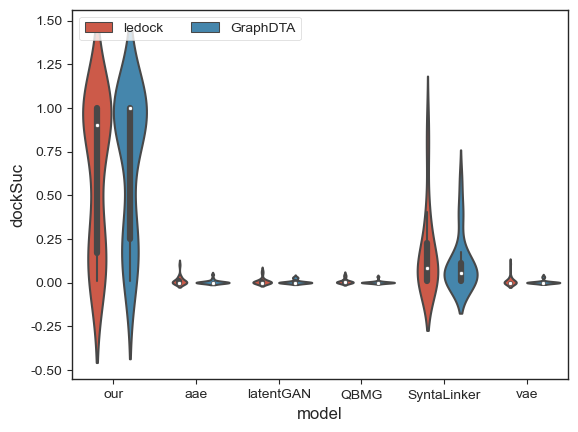

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
tips = pd.read_excel(r'C:\Users\huchao\Desktop\suc.xlsx')
# 绘制分组小提琴图
sns.violinplot(x = "model", # 指定x轴的数据
               y = "dockSuc", # 指定y轴的数据
               hue = "score", # 指定分组变量
               data = tips, # 指定绘图的数据集
               order = ['our', "aae" ,"latentGAN" ,"QBMG", "SyntaLinker", "vae"], # 指定x轴刻度标签的顺序
              )
# 添加图形标题
# 设置图例
plt.legend(loc = 'upper left', ncol = 2)
# 显示图形
plt.show()

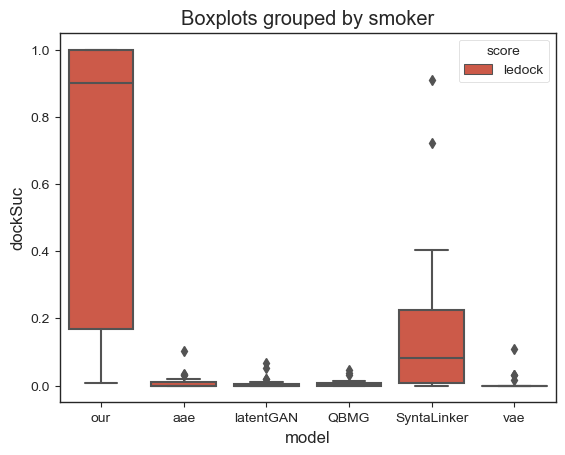

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
tips = pd.read_excel(r'C:\Users\huchao\Desktop\suc.xlsx')

fig,axes = plt.subplots()
sns.boxplot(x="model",y="dockSuc",hue= "score",
            data=tips,orient='v',ax=axes)
# orient参数表示箱形图的方向
 
axes.set_title('Boxplots grouped by smoker')
fig.savefig('p5.png')    # 将绘制的图形保存为p5.png

In [ ]:
def draw_extra_mse():
    pro_data_plot = pd.read_csv('./pro_data_plot.csv')
    smi_data_plot = pd.read_csv('./smi_data_plot.csv')

    params = {
        'font.family': 'Arial',
        'legend.fontsize': 'xx-large',
        'axes.labelsize': 'x-large',
        'axes.titlesize': 'x-large',
        'xtick.labelsize': 'x-large',
        'ytick.labelsize': 'x-large'
    }

    a = plt.figure(figsize=(11, 5))
    plt.subplot(1, 2, 1)
    plt.title('(A)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
    seaborn.set_style('ticks')
    fig1 = seaborn.violinplot(x='kind', y='MSE', data=pro_data_plot)
    plt.xlabel('', fontsize=12, weight='bold')
    plt.ylabel('MSE', fontsize=12, weight='bold')
    y_list = ['BindingDB-18', 'BindingDB-21', 'BindingDB-22']
    fig1.set_xticklabels(y_list, fontsize=10)
    plt.yticks(fontsize=10)

    plt.subplot(1, 2, 2)
    plt.title('(B)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
    seaborn.set_style('ticks')
    fig2 = seaborn.violinplot(x='kind', y='MSE', data=smi_data_plot)
    plt.xlabel('', fontsize=12, weight='bold')
    plt.ylabel('', fontsize=12, weight='bold')
    y_list = ['BindingDB-18', 'BindingDB-21', 'BindingDB-22']
    fig2.set_xticklabels(y_list, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    a = a.get_figure()
    a.savefig('./extra_mse.pdf', dpi=400, format='pdf')

0.8848342738054673


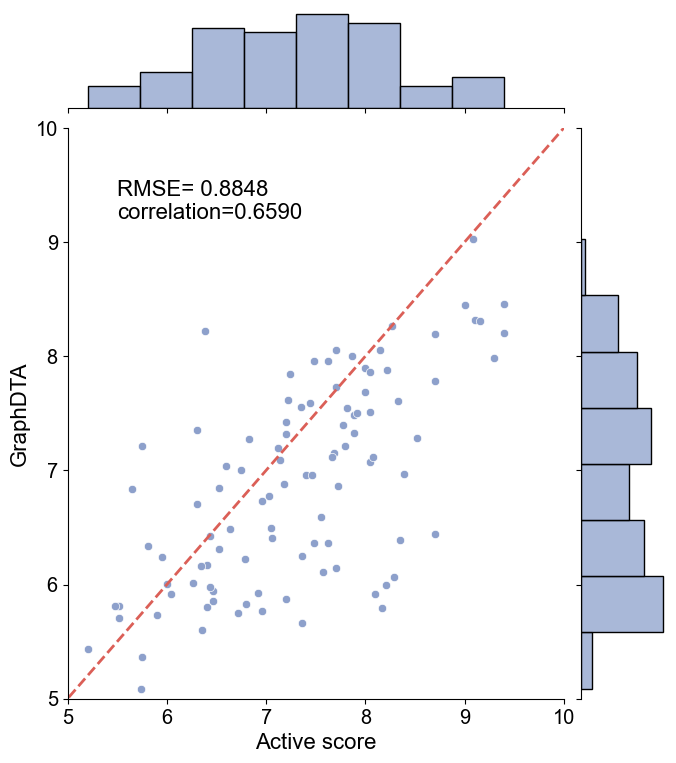

In [13]:
import pandas as pd
import seaborn
import pylab
import math
import numpy as np
import matplotlib.pyplot as plt
CDK2_score = pd.read_csv("D:\Python\Project_VAE\data\CDK2\REF_CDK2_active_score.csv")
EGFR_score = pd.read_csv("D:\Python\Project_VAE\data\EGFR\REF_EGFR_active_score.csv")
JAK1_score = pd.read_csv("D:\Python\Project_VAE\data\JAK1\REF_JAK1_active_score.csv")
LRRK2_score = pd.read_csv("D:\Python\Project_VAE\data\LRRK2\REF_LRRK2_active_score.csv")
PIM1_score = pd.read_csv("D:\Python\Project_VAE\data\PIM1\REF_PIM1_active_score.csv")
#将上面五个pandas对象拼接
Score = pd.concat([CDK2_score,EGFR_score,JAK1_score,LRRK2_score,PIM1_score],axis=0)
score = Score['score'].tolist()

CDK2_GraphDTA = pd.read_csv("D:\Python\Project_VAE\data\CDK2\REF_GraphDTA.csv")
EGFR_GraphDTA = pd.read_csv("D:\Python\Project_VAE\data\EGFR\REF_GraphDTA.csv")
JAK1_GraphDTA = pd.read_csv("D:\Python\Project_VAE\data\JAK1\REF_JAK1_GraphDTA.csv")
LRRK2_GraphDTA = pd.read_csv("D:\Python\Project_VAE\data\LRRK2\REF_LRRK2_GraphDTA.csv")
PIM1_GraphDTA = pd.read_csv("D:\Python\Project_VAE\data\PIM1\REF_PIM1_GraphDTA.csv")
#将上面五个pandas对象拼接
GraphDTA = pd.concat([CDK2_GraphDTA,EGFR_GraphDTA,JAK1_GraphDTA,LRRK2_GraphDTA,PIM1_GraphDTA],axis=0)
graphdta = GraphDTA['GraphDTA'].tolist()

color = seaborn.color_palette("Set2")  # 蓝色序号2
# color = seaborn.hls_palette(8, l=.7, s=.9) #5
color2 = seaborn.color_palette("hls", 8)
params = {
    'font.family': 'Arial',
    'legend.fontsize': 'xx-large',
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}

pylab.rcParams.update(params)
data_plot = pd.DataFrame({'GraphDTA': graphdta, 'Active score': score})
mse_min = math.floor(min([min(graphdta), min(score)]))
mse_max = math.ceil(max([max(graphdta), max(score)]))
fig = seaborn.jointplot(x='Active score', y='GraphDTA', data=data_plot, xlim=(mse_min, mse_max),
                ylim=(mse_min, mse_max), color=color[2])
fig.fig.set_figwidth(7)
fig.fig.set_figheight(8)
x = np.linspace(0, 15, 50)
y = x
fig.ax_joint.plot(x, y, color=color2[0], linewidth=2.0, linestyle='--', )
fig.set_axis_labels('Active score', 'GraphDTA', fontsize=16)
arr1 = np.array(score)
arr2 = np.array(graphdta)

corree_matrix = np.corrcoef(arr1,arr2)
rmse = np.sqrt(np.mean((arr1 - arr2) ** 2))
print(rmse)
a = corree_matrix[0,1]
s = f'''RMSE= 0.8848
correlation=0.6590
    '''
plt.text(0.1, 0.8, s=s, transform=fig.ax_joint.transAxes, fontsize=16)
fig.savefig("./correlation.png")
plt.show()

D:\Anaconda\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn-0.12.0-py3.7.egg\seaborn\categorical.py:3540: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn-0.12.0-py3.7.egg\seaborn\categorical.py:3540: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\sea

D:\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn-0.12.0-py3.7.egg\seaborn\categorical.py:3540: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn-0.12.0-py3.7.egg\seaborn\categorical.py:3540: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:102: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn-0.12.0-py3.7.egg\seaborn\categorical.py:3540: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the ma

D:\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn-0.12.0-py3.7.egg\seaborn\categorical.py:3540: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn-0.12.0-py3.7.egg\seaborn\categorical.py:3540: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn-0.12.0-py3.7.egg\seaborn\categorical.py:3540: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn-0.12.0-py3.7.egg\seaborn\categorical.py:3540: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

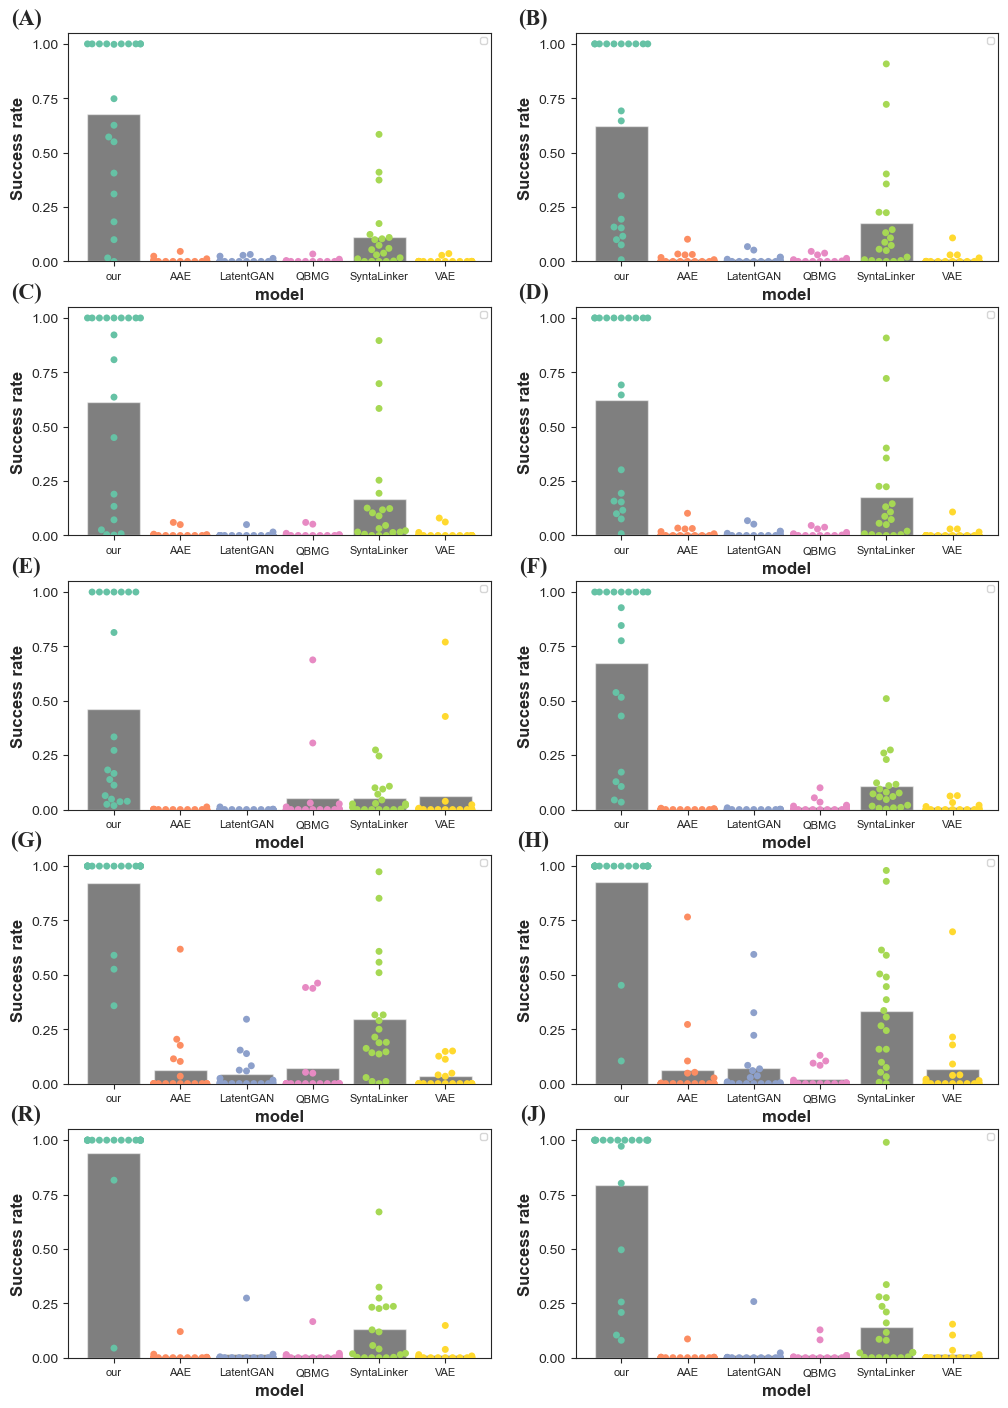

In [17]:
import seaborn
cdk2_ledock = pd.read_csv(r"C:\Users\huchao\Desktop\suc_tu\cdk2_ledock.csv")
cdk2_graphdta = pd.read_csv(r"C:\Users\huchao\Desktop\suc_tu\cdk2_graphdta.csv")
egfr_ledock = pd.read_csv(r"C:\Users\huchao\Desktop\suc_tu\egfr_ledock.csv")
egfr_graphdta = pd.read_csv(r"C:\Users\huchao\Desktop\suc_tu\egfr_graphdta.csv")
jak1_ledock = pd.read_csv(r"C:\Users\huchao\Desktop\suc_tu\jak1_ledock.csv")
jak1_graphdta = pd.read_csv(r"C:\Users\huchao\Desktop\suc_tu\jak1_graphdta.csv")
lrrk2_ledock = pd.read_csv(r"C:\Users\huchao\Desktop\suc_tu\lrrk2_ledock.csv")
lrrk2_graphdta = pd.read_csv(r"C:\Users\huchao\Desktop\suc_tu\lrrk2_graphdta.csv")
pim1_ledock = pd.read_csv(r"C:\Users\huchao\Desktop\suc_tu\pim1_ledock.csv")
pim1_graphdta = pd.read_csv(r"C:\Users\huchao\Desktop\suc_tu\pim1_graphdta.csv")

params = {
    'font.family': 'Arial',
    'legend.fontsize': 'xx-large',
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}

a = plt.figure(figsize=(12,35))
plt.subplot(10, 2, 1)
plt.title('(A)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
seaborn.set_style('ticks')
means = cdk2_graphdta.groupby(['model'],sort=False)["dockSuc"].mean()
fig1 = seaborn.swarmplot(x='model', y='dockSuc', data=cdk2_graphdta, palette="Set2")
plt.legend(loc='upper right',fontsize=6)
#seaborn.pointplot(x=means.index, y=means.values, color='k', markers='s', linestyles='--', ax=fig1)
x_pos = range(len(means))
fig1.bar(x_pos, means.values, color='k', alpha=0.5)
plt.xlabel('model', fontsize=12, weight='bold')
plt.ylabel('Success rate', fontsize=12, weight='bold')
y_list = ['our', "AAE" ,"LatentGAN" ,"QBMG", "SyntaLinker", "VAE"]
fig1.set_xticklabels(y_list, fontsize=8)
plt.yticks(fontsize=10)

plt.subplot(10, 2, 2)
plt.title('(B)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
seaborn.set_style('ticks')
means = cdk2_ledock.groupby(['model'],sort=False)["dockSuc"].mean()
fig1 = seaborn.swarmplot(x='model', y='dockSuc', data=cdk2_ledock, palette="Set2")
plt.legend(loc='upper right',fontsize=6)
#seaborn.pointplot(x=means.index, y=means.values, color='k', markers='s', linestyles='--', ax=fig1)
x_pos = range(len(means))
fig1.bar(x_pos, means.values, color='k', alpha=0.5)
plt.xlabel('model', fontsize=12, weight='bold')
plt.ylabel('Success rate', fontsize=12, weight='bold')
y_list = ['our', "AAE" ,"LatentGAN" ,"QBMG", "SyntaLinker", "VAE"]
fig1.set_xticklabels(y_list, fontsize=8)
plt.yticks(fontsize=10)

plt.subplot(10, 2, 3)
plt.title('(C)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
seaborn.set_style('ticks')
means = egfr_graphdta.groupby(['model'],sort=False)["dockSuc"].mean()
fig1 = seaborn.swarmplot(x='model', y='dockSuc', data=egfr_graphdta, palette="Set2")
plt.legend(loc='upper right',fontsize=6)
#seaborn.pointplot(x=means.index, y=means.values, color='k', markers='s', linestyles='--', ax=fig1)
x_pos = range(len(means))
fig1.bar(x_pos, means.values, color='k', alpha=0.5)
plt.xlabel('model', fontsize=12, weight='bold')
plt.ylabel('Success rate', fontsize=12, weight='bold')
y_list = ['our', "AAE" ,"LatentGAN" ,"QBMG", "SyntaLinker", "VAE"]
fig1.set_xticklabels(y_list, fontsize=8)
plt.yticks(fontsize=10)

plt.subplot(10, 2, 4)
plt.title('(D)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
seaborn.set_style('ticks')
means = cdk2_ledock.groupby(['model'],sort=False)["dockSuc"].mean()
fig1 = seaborn.swarmplot(x='model', y='dockSuc', data=cdk2_ledock, palette="Set2")
plt.legend(loc='upper right',fontsize=6)
#seaborn.pointplot(x=means.index, y=means.values, color='k', markers='s', linestyles='--', ax=fig1)
x_pos = range(len(means))
fig1.bar(x_pos, means.values, color='k', alpha=0.5)
plt.xlabel('model', fontsize=12, weight='bold')
plt.ylabel('Success rate', fontsize=12, weight='bold')
y_list = ['our', "AAE" ,"LatentGAN" ,"QBMG", "SyntaLinker", "VAE"]
fig1.set_xticklabels(y_list, fontsize=8)
plt.yticks(fontsize=10)

plt.subplot(10, 2, 5)
plt.title('(E)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
seaborn.set_style('ticks')
means = jak1_graphdta.groupby(['model'],sort=False)["dockSuc"].mean()
fig1 = seaborn.swarmplot(x='model', y='dockSuc', data=jak1_graphdta, palette="Set2")
plt.legend(loc='upper right',fontsize=6)
#seaborn.pointplot(x=means.index, y=means.values, color='k', markers='s', linestyles='--', ax=fig1)
x_pos = range(len(means))
fig1.bar(x_pos, means.values, color='k', alpha=0.5)
plt.xlabel('model', fontsize=12, weight='bold')
plt.ylabel('Success rate', fontsize=12, weight='bold')
y_list = ['our', "AAE" ,"LatentGAN" ,"QBMG", "SyntaLinker", "VAE"]
fig1.set_xticklabels(y_list, fontsize=8)
plt.yticks(fontsize=10)

plt.subplot(10, 2,6)
plt.title('(F)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
seaborn.set_style('ticks')
means = jak1_ledock.groupby(['model'],sort=False)["dockSuc"].mean()
fig1 = seaborn.swarmplot(x='model', y='dockSuc', data=jak1_ledock, palette="Set2")
plt.legend(loc='upper right',fontsize=6)
#seaborn.pointplot(x=means.index, y=means.values, color='k', markers='s', linestyles='--', ax=fig1)
x_pos = range(len(means))
fig1.bar(x_pos, means.values, color='k', alpha=0.5)
plt.xlabel('model', fontsize=12, weight='bold')
plt.ylabel('Success rate', fontsize=12, weight='bold')
y_list = ['our', "AAE" ,"LatentGAN" ,"QBMG", "SyntaLinker", "VAE"]
fig1.set_xticklabels(y_list, fontsize=8)
plt.yticks(fontsize=10)

plt.subplot(10, 2, 7)
plt.title('(G)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
seaborn.set_style('ticks')
means = lrrk2_graphdta.groupby(['model'],sort=False)["dockSuc"].mean()
fig1 = seaborn.swarmplot(x='model', y='dockSuc', data=lrrk2_graphdta, palette="Set2")
plt.legend(loc='upper right',fontsize=6)
#seaborn.pointplot(x=means.index, y=means.values, color='k', markers='s', linestyles='--', ax=fig1)
x_pos = range(len(means))
fig1.bar(x_pos, means.values, color='k', alpha=0.5)
plt.xlabel('model', fontsize=12, weight='bold')
plt.ylabel('Success rate', fontsize=12, weight='bold')
y_list = ['our', "AAE" ,"LatentGAN" ,"QBMG", "SyntaLinker", "VAE"]
fig1.set_xticklabels(y_list, fontsize=8)
plt.yticks(fontsize=10)

plt.subplot(10, 2, 8)
plt.title('(H)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
seaborn.set_style('ticks')
means = lrrk2_ledock.groupby(['model'],sort=False)["dockSuc"].mean()
fig1 = seaborn.swarmplot(x='model', y='dockSuc', data=lrrk2_ledock, palette="Set2")
plt.legend(loc='upper right',fontsize=6)
#seaborn.pointplot(x=means.index, y=means.values, color='k', markers='s', linestyles='--', ax=fig1)
x_pos = range(len(means))
fig1.bar(x_pos, means.values, color='k', alpha=0.5)
plt.xlabel('model', fontsize=12, weight='bold')
plt.ylabel('Success rate', fontsize=12, weight='bold')
y_list = ['our', "AAE" ,"LatentGAN" ,"QBMG", "SyntaLinker", "VAE"]
fig1.set_xticklabels(y_list, fontsize=8)
plt.yticks(fontsize=10)

plt.subplot(10, 2, 9)
plt.title('(R)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
seaborn.set_style('ticks')
means = pim1_graphdta.groupby(['model'],sort=False)["dockSuc"].mean()
fig1 = seaborn.swarmplot(x='model', y='dockSuc', data=pim1_graphdta, palette="Set2")
plt.legend(loc='upper right',fontsize=6)
#seaborn.pointplot(x=means.index, y=means.values, color='k', markers='s', linestyles='--', ax=fig1)
x_pos = range(len(means))
fig1.bar(x_pos, means.values, color='k', alpha=0.5)
plt.xlabel('model', fontsize=12, weight='bold')
plt.ylabel('Success rate', fontsize=12, weight='bold')
y_list = ['our', "AAE" ,"LatentGAN" ,"QBMG", "SyntaLinker", "VAE"]
fig1.set_xticklabels(y_list, fontsize=8)
plt.yticks(fontsize=10)

plt.subplot(10, 2, 10)
plt.title('(J)', fontdict={'family': 'Times New Roman', 'size': 16}, x=-0.1, y=1.0, weight='bold')
seaborn.set_style('ticks')
means = pim1_ledock.groupby(['model'],sort=False)["dockSuc"].mean()
fig1 = seaborn.swarmplot(x='model', y='dockSuc', data=pim1_ledock, palette="Set2")
plt.legend(loc='upper right',fontsize=6)
#seaborn.pointplot(x=means.index, y=means.values, color='k', markers='s', linestyles='--', ax=fig1)
x_pos = range(len(means))
fig1.bar(x_pos, means.values, color='k', alpha=0.5)
plt.xlabel('model', fontsize=12, weight='bold')
plt.ylabel('Success rate', fontsize=12, weight='bold')
y_list = ['our', "AAE" ,"LatentGAN" ,"QBMG", "SyntaLinker", "VAE"]
fig1.set_xticklabels(y_list, fontsize=8)
plt.yticks(fontsize=10)

plt.savefig('swarmplot.png',bbox_inches='tight')